Nama: Muhammad Izzah Alfatih

NIM: 201012310019

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.9MB/s]


In [3]:
!unzip -q diabetes-data-set.zip

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

In [6]:
df = pd.read_csv('/content/diabetes.csv')

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df = df.fillna(df.mean())

In [11]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
df.loc[df['Glucose']==0.0,"Glucose"] = np.NAN
df.loc[df['BloodPressure']==0.0,"BloodPressure"] = np.NAN
df.loc[df['SkinThickness']==0.0,"SkinThickness"] = np.NAN
df.loc[df['Insulin']==0.0,"Insulin"] = np.NAN
df.loc[df['BMI']==0.0,"BMI"] = np.NAN

df.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<Axes: >

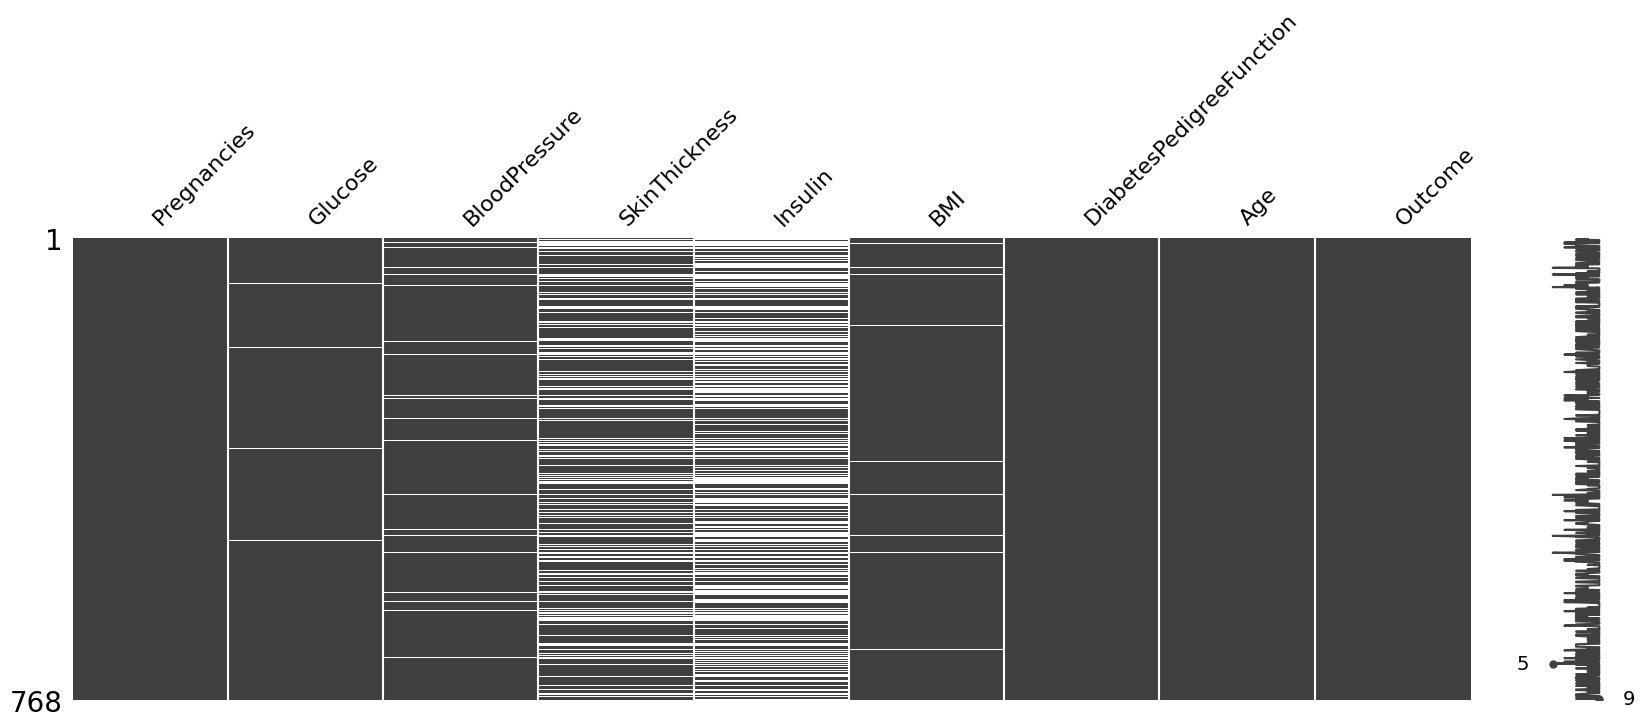

In [15]:
mno.matrix(df, figsize=(20,6))

In [16]:
missing_columns = ['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']

In [17]:
def random_imputation(df,feature):
  number_missing = df[feature].isnull().sum()
  observed_values = df.loc[df[feature].notnull(), feature]
  df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace=True)

  return df

In [18]:
for feature in missing_columns:
  df[feature + '_imp'] = df[feature]
  df = random_imputation(df,feature)

<Axes: >

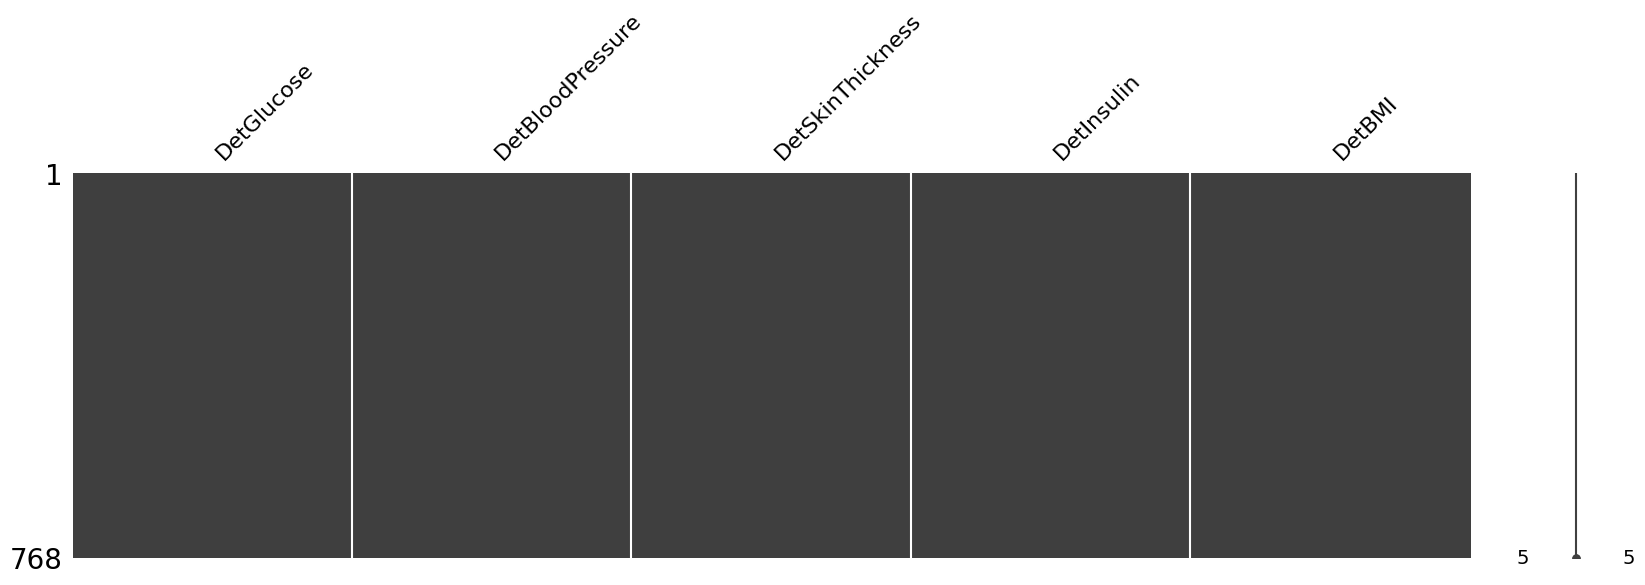

In [21]:
deter_data = pd.DataFrame(columns = ['Det'+ name for name in missing_columns])

for feature in missing_columns:
  deter_data['Det'+feature] = df[feature+'_imp']
  parameters = list(set(df.columns) - set(missing_columns) - {feature+'_imp'})

  model = linear_model.LinearRegression()
  model.fit(X = df[parameters], y = df[feature+'_imp'])

  deter_data.loc[df[feature].isnull(), 'Det'+feature] = model.predict(df[parameters])[df[feature].isnull()]

mno.matrix(deter_data, figsize = (20,5))

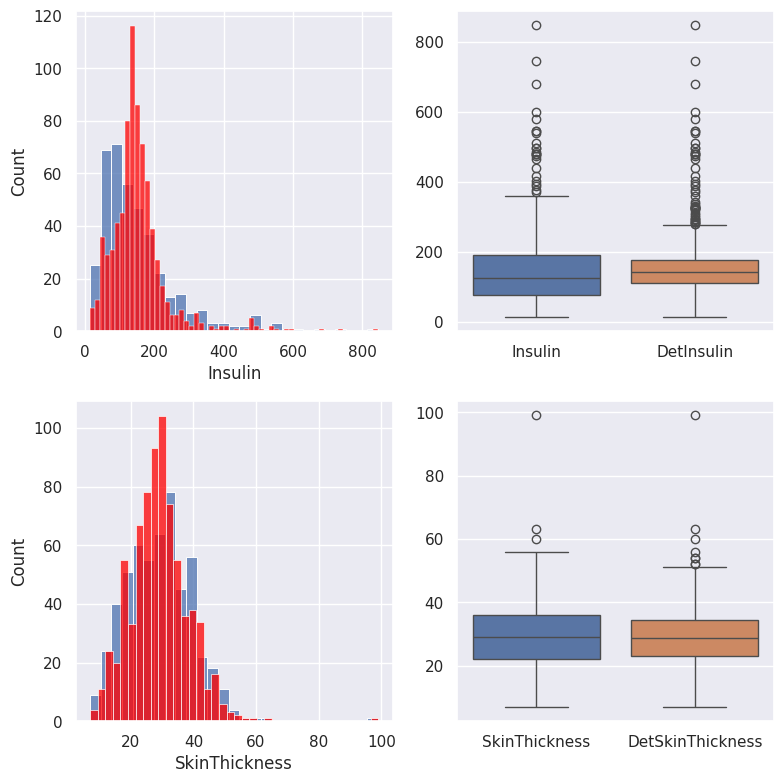

In [23]:
sns.set()

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(8,8)

for index, variable in enumerate(['Insulin','SkinThickness']):
  sns.histplot(df[variable].dropna(), kde = False, ax = axes[index,0])
  sns.histplot(deter_data['Det'+variable], kde = False, ax = axes[index,0], color = 'red')

  sns.boxplot(data = pd.concat([df[variable], deter_data['Det'+variable]], axis = 1), ax = axes[index,1])

plt.tight_layout()